In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/credit.csv")

In [111]:
df.shape

(1000, 17)

In [112]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [114]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [115]:
mode1=df['checking_balance'].mode().values[0]
df['checking_balance']=df['checking_balance'].replace('unknown',value=np.NaN)
df['checking_balance']=df['checking_balance'].astype(object)
df['checking_balance']=df['checking_balance'].replace(np.NaN,mode1)

In [116]:
mode2=df['purpose'].mode().values[0]
df['purpose']=df['purpose'].replace('car0',value=np.NaN)
df['purpose']=df['purpose'].astype(object)
df['purpose']=df['purpose'].replace(np.NaN,mode2)
mode2=df['savings_balance'].mode().values[0]
df['savings_balance']=df['savings_balance'].replace('unknown',value=np.NaN)
df['savings_balance']=df['savings_balance'].astype(object)
df['savings_balance']=df['savings_balance'].replace(np.NaN,mode2)

In [117]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default


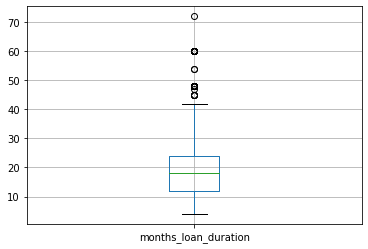

In [118]:
df.boxplot(column=["months_loan_duration"])
plt.show()

In [119]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

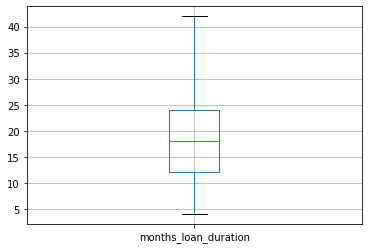

In [120]:
lower_range,upper_range=remove_outlier(df['months_loan_duration'])
df['months_loan_duration']=np.where(df['months_loan_duration']>upper_range,upper_range,df['months_loan_duration'])
df['months_loan_duration']=np.where(df['months_loan_duration']<lower_range,lower_range,df['months_loan_duration'])
df.boxplot(column=['months_loan_duration'])
plt.show()

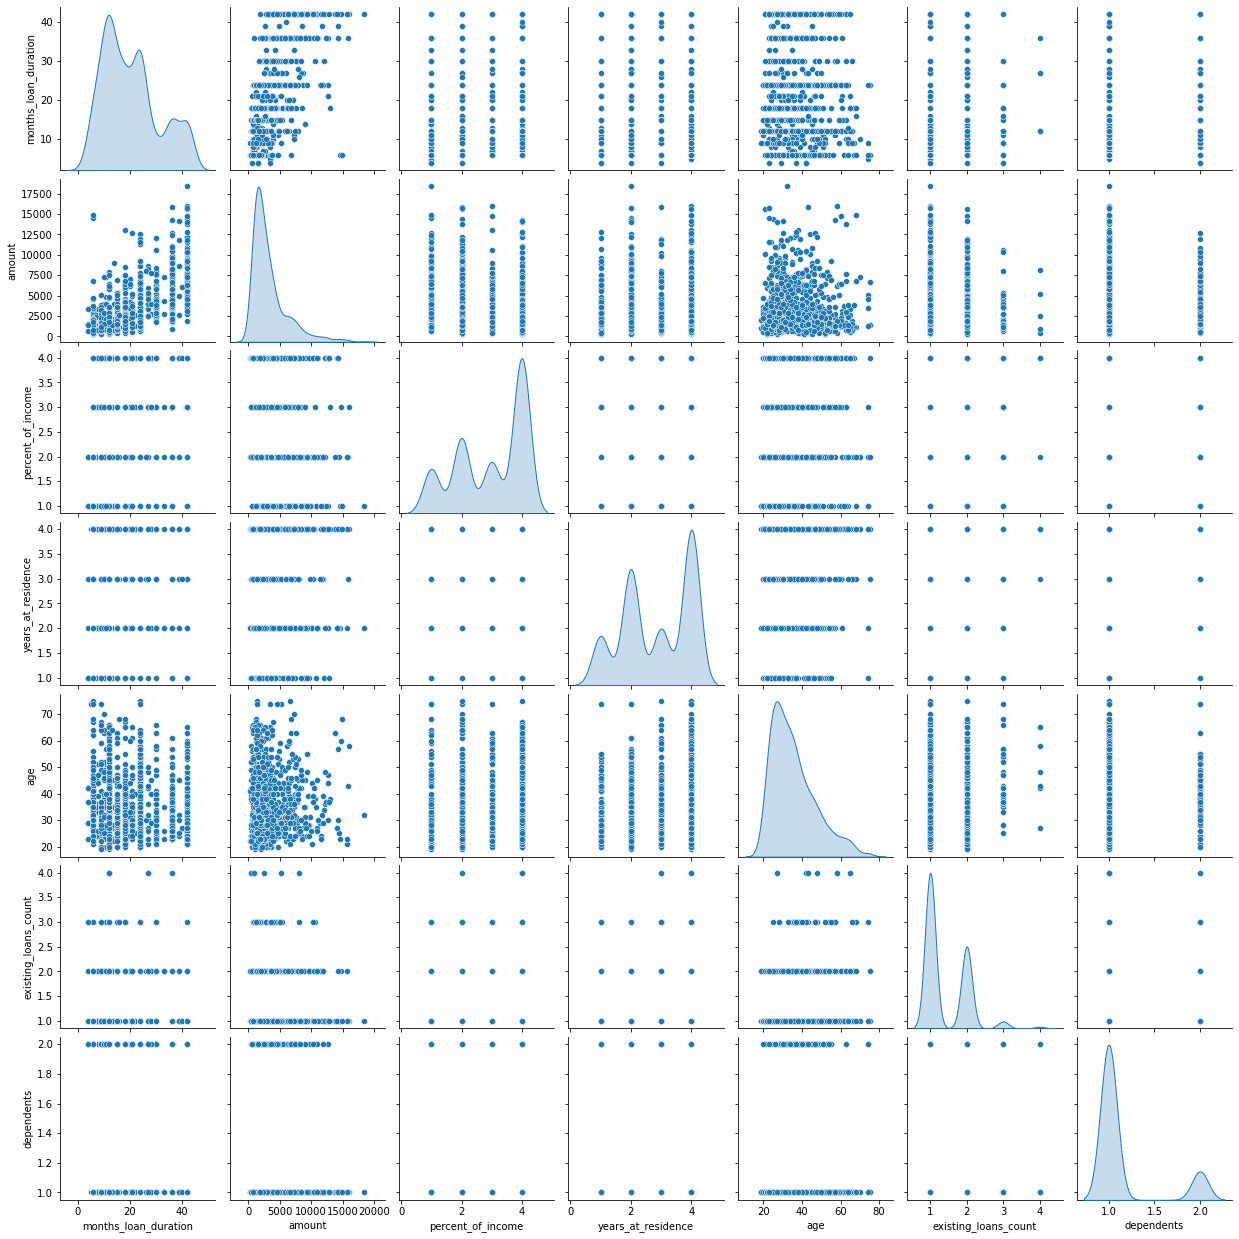

In [121]:
sns.pairplot(df,diag_kind="kde")

<AxesSubplot:>

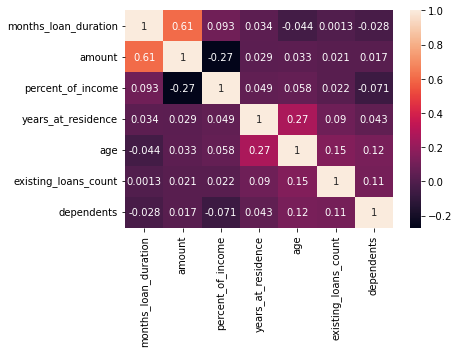

In [122]:
plt.figure()
sns.heatmap(df.corr(),annot=True)

In [123]:
df['default'] = df['default'].apply(lambda x: 0 if x=='no' else 1)

In [124]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6.0,critical,furniture/appliances,1169,< 100 DM,> 7 years,4,4,67,none,own,2,skilled,1,yes,0
1,1 - 200 DM,42.0,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,1
2,unknown,12.0,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,0
3,< 0 DM,42.0,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,0
4,< 0 DM,24.0,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,1


In [125]:
dummies=pd.get_dummies(df[["credit_history","purpose","employment_duration","other_credit","housing","job","phone","checking_balance","savings_balance"]],
                       columns=["credit_history","purpose","employment_duration","other_credit","housing","job","phone","checking_balance","savings_balance"])

In [126]:
columns=["credit_history","purpose","employment_duration","other_credit","housing","job","phone","checking_balance","savings_balance"]
df=pd.concat([df,dummies],axis=1)
df.drop(columns,axis=1,inplace=True)
df.dtypes

months_loan_duration               float64
amount                               int64
percent_of_income                    int64
years_at_residence                   int64
age                                  int64
existing_loans_count                 int64
dependents                           int64
default                              int64
credit_history_critical              uint8
credit_history_good                  uint8
credit_history_perfect               uint8
credit_history_poor                  uint8
credit_history_very good             uint8
purpose_business                     uint8
purpose_car                          uint8
purpose_education                    uint8
purpose_furniture/appliances         uint8
purpose_renovations                  uint8
employment_duration_1 - 4 years      uint8
employment_duration_4 - 7 years      uint8
employment_duration_< 1 year         uint8
employment_duration_> 7 years        uint8
employment_duration_unemployed       uint8
other_credi

In [127]:
df.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,credit_history_critical,credit_history_good,...,phone_no,phone_yes,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM
0,6.0,1169,4,4,67,2,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,42.0,5951,2,2,22,1,1,1,0,1,...,1,0,1,0,0,0,0,0,1,0
2,12.0,2096,2,3,49,1,2,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,42.0,7882,2,4,45,1,2,0,0,1,...,1,0,0,1,0,0,0,0,1,0
4,24.0,4870,3,4,53,2,2,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [128]:
x=df.drop(['default'],axis=1)
y=df[['default']]

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [130]:
reg_model=LogisticRegression()
reg_model.fit(x_train,y_train)

C:\Users\fayaz\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fayaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
reg_model.score(x_train,y_train)

0.7671428571428571

In [132]:
reg_model.score(x_test,y_test)

0.7333333333333333

In [133]:
predictions=reg_model.predict(x_test)

In [134]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       214
           1       0.54      0.47      0.50        86

    accuracy                           0.73       300
   macro avg       0.67      0.65      0.66       300
weighted avg       0.72      0.73      0.73       300



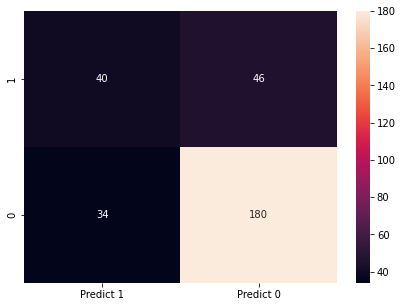

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])

df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                    columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

In [142]:
clf=SVC(kernel='linear',C=3,gamma='auto',random_state=1)
clf.fit(x_train,y_train)

C:\Users\fayaz\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=3, gamma='auto', kernel='linear', random_state=1)

In [143]:
clf.score(x_test,y_test)

0.7233333333333334

In [144]:
clf.score(x_train,y_train)

0.7657142857142857

In [185]:
knn=KNeighborsClassifier(weights='uniform',)
knn.fit(x_train,y_train)

C:\Users\fayaz\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [186]:
knn.score(x_train,y_train)

0.7785714285714286

In [187]:
knn.score(x_test,y_test)

0.63

In [254]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=4)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [255]:
dtc.score(x_train,y_train)

0.7585714285714286

In [256]:
dtc.score(x_test,y_test)

0.7133333333333334

In [269]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(n_estimators=20,max_samples=25)
bc.fit(x_train,y_train)

C:\Users\fayaz\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(max_samples=25, n_estimators=20)

In [270]:
bc.score(x_train,y_train)

0.7414285714285714

In [271]:
bc.score(x_test,y_test)

0.7133333333333334

In [272]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)

C:\Users\fayaz\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [273]:
abc.score(x_train,y_train)

0.7957142857142857

In [274]:
abc.score(x_train,y_train)

0.7957142857142857

In [275]:
abc.score(x_test,y_test)

0.7266666666666667

In [297]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(loss='deviance',n_estimators=20,subsample=1,criterion='friedman_mse')
gbc.fit(x_train,y_train)

C:\Users\fayaz\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(n_estimators=20, subsample=1)

In [298]:
gbc.score(x_train,y_train)

0.7971428571428572

In [299]:
gbc.score(x_test,y_test)

0.7333333333333333

In [305]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

C:\Users\fayaz\AppData\Local\Temp\ipykernel_17664\2210184639.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier()

In [306]:
rfc.score(x_train,y_train)

1.0

In [307]:
rfc.score(x_test,y_test)

0.7466666666666667